### What is Data Augmentation?

Data augmentation is a technique used in machine learning and computer vision to increase the size of the training dataset by creating new variations of the existing data. The idea is to artificially generate new samples by applying transformations or perturbations to the original data that do not change their underlying meaning.

For example, in image classification tasks, data augmentation techniques can be used to generate new images by applying random transformations like rotation, scaling, flipping, and shearing to the original images. Similarly, in natural language processing tasks, data augmentation techniques can be used to generate new text data by applying techniques like synonym replacement, random insertion/deletion of words, and paraphrasing.

Data augmentation is an effective technique for improving the generalization of machine learning models by exposing them to a wider range of variations in the training data. This can help reduce overfitting and improve the model's ability to perform well on new, unseen data.

### Why is Data Augmentation Important?

Data augmentation is important because it:

Increases the amount of training data without collecting more data.
Improves model generalization and prevents overfitting.
Helps to reduce bias and balance datasets.
Enhances model robustness to noisy or corrupted input data.
In summary, data augmentation is a useful technique for improving the performance and robustness of machine learning models in scenarios with limited data, imbalanced data, or noisy data.

### What are some examples of Data Augmentation?

Image data augmentation: This involves applying transformations such as rotation, scaling, flipping, and shearing to the original images to generate new images. This can increase the size of the dataset and also improve the model's ability to recognize objects in different orientations and lighting conditions.

Text data augmentation: This involves applying techniques such as synonym replacement, random insertion/deletion of words, and paraphrasing to the original text to generate new text samples. This can help improve the performance of natural language processing models.

Audio data augmentation: This involves applying techniques such as time stretching, pitch shifting, and adding background noise to the original audio samples to generate new audio samples. This can help improve the performance of speech recognition and audio classification models.

Video data augmentation: This involves applying transformations such as cropping, scaling, and flipping to the original videos to generate new video samples. This can help improve the performance of video classification models.

Synthetic data generation: This involves using computer graphics techniques to generate synthetic images, videos, or 3D models that can be used to train machine learning models. This can be particularly useful in scenarios where it is difficult or expensive to collect real-world data.

Flipping the images. You can flip images horizontally and vertically.  a vertical flip is equivalent to rotating an image by 180 degrees and then performing a horizontal flip

In [1]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('dog.jpg')
img = cv2.resize(img,(400,300))
cv2.imshow('output',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)

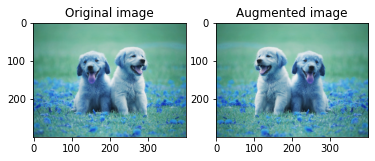

In [4]:
# NumPy.'img' = A single image.
flip_1 = np.fliplr(img)
visualize(img,flip_1)

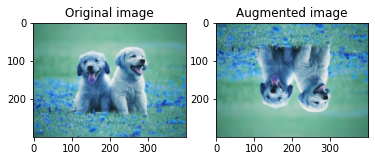

In [5]:
# TensorFlow. 'x' = A placeholder for an image.
#shape = [height, width, channels]
#x = tf.placeholder(dtype = tf.float32, shape = shape)
flip_2 = tf.image.flip_up_down(img)
flip_3 = tf.image.flip_left_right(img)
#flip_4 = tf.image.random_flip_up_down(img)
#flip_5 = tf.image.random_flip_left_right(img)
visualize(img,flip_2)

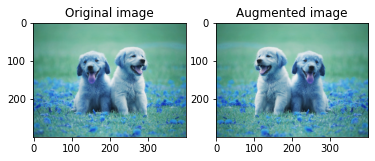

In [6]:
visualize(img,flip_3)

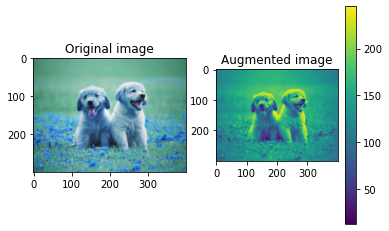

In [7]:
grayscaled = tf.image.rgb_to_grayscale(img)
visualize(img, tf.squeeze(grayscaled))
_ = plt.colorbar()

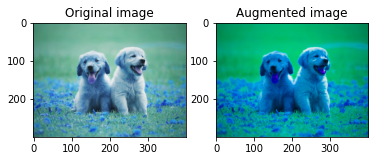

In [8]:
saturated = tf.image.adjust_saturation(img, 8)
visualize(img, saturated)

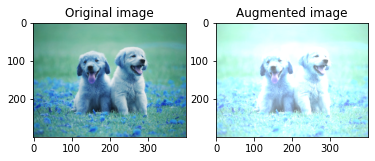

In [9]:
bright = tf.image.adjust_brightness(img, 0.4)
visualize(img, bright)

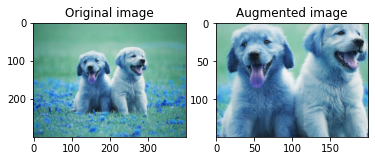

In [10]:
cropped = tf.image.central_crop(img, central_fraction=0.5)
visualize(img,cropped)

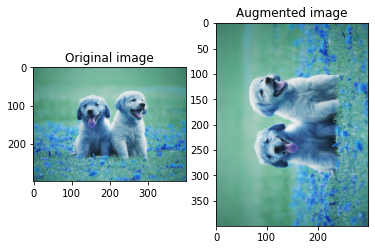

In [11]:
rotated = tf.image.rot90(img)
visualize(img, rotated)

The brightness factor is chosen randomly in the range [-max_delta, max_delta) and is associated with the given seed

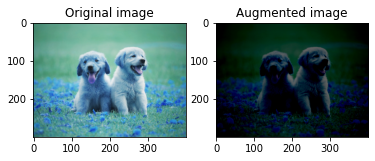

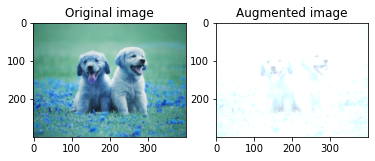

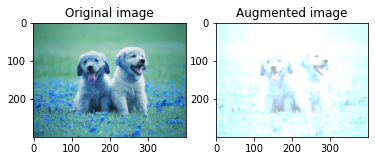

In [12]:
for i in range(3):
    seed = (i, 0)  # tuple of size (2,)
    stateless_random_brightness = tf.image.stateless_random_brightness(
      img, max_delta=0.95, seed=seed)
    visualize(img, stateless_random_brightness)

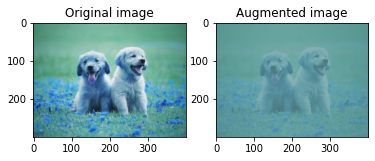

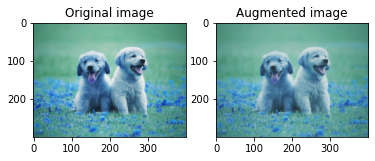

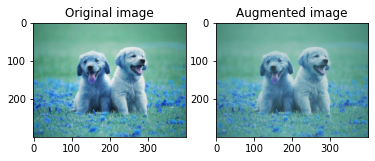

In [13]:
for i in range(3):
    seed = (i, 0)  # tuple of size (2,)
    stateless_random_contrast = tf.image.stateless_random_contrast(
      img, lower=0.1, upper=0.9, seed=seed)
    visualize(img, stateless_random_contrast)

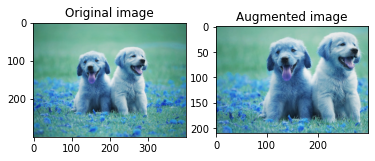

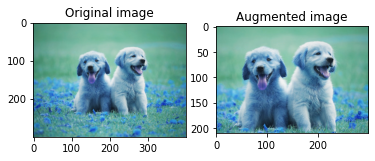

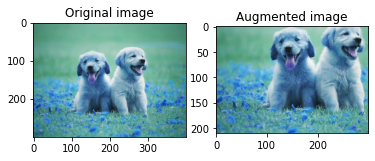

In [15]:
for i in range(3):
    seed = (i, 0)  # tuple of size (2,)
    stateless_random_crop = tf.image.stateless_random_crop(
      img, size=[210, 300, 3], seed=seed)
    visualize(img, stateless_random_crop)

#### We will test how data augmentation improves the accuracy

we used a simple Convolutional Neural Network model with only one hidden layer. Model gave accuracy of 66.94% on test data. We tried to improve the accuracy further by increasing the number of convolutional layers.

Goal of this part is to improve the accuracy of the model by using data augmentation like horizontal flip, zooming, etc.